In [1]:
import sys
sys.path.insert(0, '../')
from gw_tools.gw_plot import gw_plot
from gw_tools import data_prep
from gw_tools.gw_cnn import gw_cnn
from keras.callbacks import EarlyStopping
import datetime
import IPython
import IPython.display
from keras.losses import MeanSquaredError
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df = data_prep.load_data('APK310')
df = data_prep.select_features(df)
df = data_prep.add_toy_signal(df)
X_train, X_holdout, y_train, y_holdout, dt_train, dt_holdout = data_prep.prep_data_for_training(df)

In [3]:
scaler =  StandardScaler(copy=True)
gw_cnn = gw_cnn()

pipe = Pipeline([('scaler', scaler), 
                     ('gw_cnn', gw_cnn)])

In [4]:
## Time series cross validation split
N_SPLITS = 5
tscv = TimeSeriesSplit(n_splits=N_SPLITS, test_size=365, gap=0)

## Scaler to normalize the feature values
scaler =  StandardScaler(copy=True)

## Pipeline to scale the data and fit the model
pipe = Pipeline([('scaler', scaler), 
                     ('gw_cnn', gw_cnn)])

## Cross validate
mses_cnn = np.zeros(N_SPLITS)
i = 0
for train, test in tscv.split(X_train, y_train):
    ## Split the data into train/test sets
    X_tt = X_train[train]
    y_tt = y_train[train]
    X_ho = X_train[test]
    y_ho = y_train[test]

    pipe.fit(X_tt,y_tt)

    ## Make predictions
    pred = pipe.predict(X_ho)

    ## Score the model
    mse = np.mean((pred-y_ho)**2)
    mses_cnn[i] = mse

    i += 1

2023-11-12 11:40:41.392766: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2023-11-12 11:40:41.392782: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2023-11-12 11:40:41.392787: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2023-11-12 11:40:41.392819: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-12 11:40:41.392832: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100
 1/28 [>.............................] - ETA: 9s - loss: 13148.2930

2023-11-12 11:40:41.778989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


28/28 [==============================] - 1s 8ms/step - loss: 8750.6562
Epoch 2/100
28/28 [==============================] - 0s 5ms/step - loss: 1139.2261
Epoch 3/100
28/28 [==============================] - 0s 5ms/step - loss: 545.2372
Epoch 4/100
28/28 [==============================] - 0s 5ms/step - loss: 448.1594
Epoch 5/100
28/28 [==============================] - 0s 5ms/step - loss: 355.3068
Epoch 6/100
28/28 [==============================] - 0s 5ms/step - loss: 283.5868
Epoch 7/100
28/28 [==============================] - 0s 5ms/step - loss: 219.5569
Epoch 8/100
28/28 [==============================] - 0s 5ms/step - loss: 167.2207
Epoch 9/100
28/28 [==============================] - 0s 5ms/step - loss: 119.0841
Epoch 10/100
28/28 [==============================] - 0s 5ms/step - loss: 88.7069
Epoch 11/100
28/28 [==============================] - 0s 5ms/step - loss: 62.9245
Epoch 12/100
28/28 [==============================] - 0s 5ms/step - loss: 41.6948
Epoch 13/100
28/28 [======

2023-11-12 11:40:47.863115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/34 [=======>......................] - ETA: 0s - loss: 12804.0137

2023-11-12 11:40:48.118677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 1s 8ms/step - loss: 8522.6953
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 775.2072
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 484.5881
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 392.1012
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 318.2555
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 239.8717
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 174.4007
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 120.6220
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 78.8639
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 52.6679
Epoch 11/100
34/34 [==============================] - 0s 5ms/step - loss: 35.4452
Epoch 12/100
34/34 [==============================] - 0s 5ms/step - loss: 25.0336
Epoch 13/100
34/34 [========

2023-11-12 11:40:54.898591: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/40 [======>.......................] - ETA: 0s - loss: 12819.6318

2023-11-12 11:40:55.138865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 1s 7ms/step - loss: 8533.5889
Epoch 2/100
40/40 [==============================] - 0s 5ms/step - loss: 762.3192
Epoch 3/100
40/40 [==============================] - 0s 5ms/step - loss: 445.3844
Epoch 4/100
40/40 [==============================] - 0s 5ms/step - loss: 361.6526
Epoch 5/100
40/40 [==============================] - 0s 5ms/step - loss: 280.8458
Epoch 6/100
40/40 [==============================] - 0s 5ms/step - loss: 203.5514
Epoch 7/100
40/40 [==============================] - 0s 5ms/step - loss: 138.5680
Epoch 8/100
40/40 [==============================] - 0s 5ms/step - loss: 86.1866
Epoch 9/100
40/40 [==============================] - 0s 5ms/step - loss: 49.7100
Epoch 10/100
40/40 [==============================] - 0s 5ms/step - loss: 30.4037
Epoch 11/100
40/40 [==============================] - 0s 5ms/step - loss: 24.6799
Epoch 12/100
40/40 [==============================] - 0s 5ms/step - loss: 18.3058
Epoch 13/100
40/40 [=========

2023-11-12 11:41:03.795255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 9/45 [=====>........................] - ETA: 0s - loss: 12878.2695 

2023-11-12 11:41:04.050085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


45/45 [==============================] - 1s 7ms/step - loss: 8038.6836
Epoch 2/100
45/45 [==============================] - 0s 5ms/step - loss: 652.4410
Epoch 3/100
45/45 [==============================] - 0s 5ms/step - loss: 413.4410
Epoch 4/100
45/45 [==============================] - 0s 5ms/step - loss: 307.3279
Epoch 5/100
45/45 [==============================] - 0s 5ms/step - loss: 205.6878
Epoch 6/100
45/45 [==============================] - 0s 5ms/step - loss: 127.7769
Epoch 7/100
45/45 [==============================] - 0s 5ms/step - loss: 71.1330
Epoch 8/100
45/45 [==============================] - 0s 5ms/step - loss: 40.4011
Epoch 9/100
45/45 [==============================] - 0s 5ms/step - loss: 23.1876
Epoch 10/100
45/45 [==============================] - 0s 5ms/step - loss: 16.3665
Epoch 11/100
45/45 [==============================] - 0s 5ms/step - loss: 14.0061
Epoch 12/100
45/45 [==============================] - 0s 5ms/step - loss: 11.1126
Epoch 13/100
45/45 [==========

2023-11-12 11:41:12.488251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


 8/51 [===>..........................] - ETA: 0s - loss: 12833.9658 

2023-11-12 11:41:12.736012: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


51/51 [==============================] - 1s 7ms/step - loss: 9261.3926
Epoch 2/100
51/51 [==============================] - 0s 5ms/step - loss: 693.7550
Epoch 3/100
51/51 [==============================] - 0s 5ms/step - loss: 450.8277
Epoch 4/100
51/51 [==============================] - 0s 5ms/step - loss: 385.7761
Epoch 5/100
51/51 [==============================] - 0s 5ms/step - loss: 309.4075
Epoch 6/100
51/51 [==============================] - 0s 5ms/step - loss: 239.9610
Epoch 7/100
51/51 [==============================] - 0s 5ms/step - loss: 172.7322
Epoch 8/100
51/51 [==============================] - 0s 5ms/step - loss: 104.4165
Epoch 9/100
51/51 [==============================] - 0s 5ms/step - loss: 57.5117
Epoch 10/100
51/51 [==============================] - 0s 5ms/step - loss: 37.5270
Epoch 11/100
51/51 [==============================] - 0s 5ms/step - loss: 23.1144
Epoch 12/100
51/51 [==============================] - 0s 5ms/step - loss: 18.4890
Epoch 13/100
51/51 [========

2023-11-12 11:41:20.637808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [5]:
score = pipe.score(X_holdout,y_holdout)
print(f'During cross validation, the average root mean squared error for this model was {np.sqrt(np.mean(mses_cnn))}')
print(f'On the holdout set, the root mean squared error for this model is {np.sqrt(-score)}.')

12/12 [==============================] - 0s 2ms/step
During cross validation, the average root mean squared error for this model was 5.06459255134941
On the holdout set, the root mean squared error for this model is 6.1828267764524.


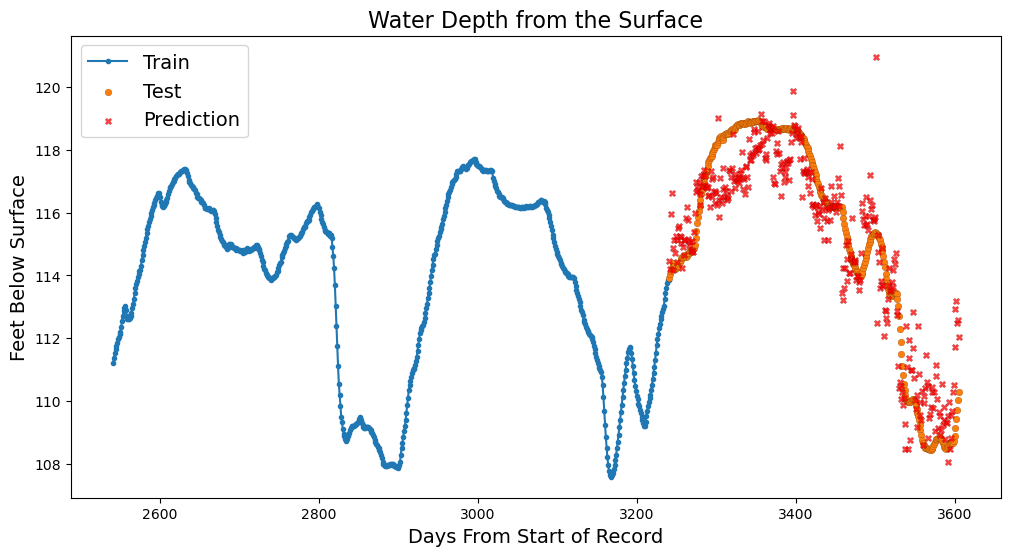

In [6]:
gw_plot(train=y_tt, test=y_ho, pred=pred, train_limit=700)